## Medici&oacute;n y An&aacute;lisis de Reacciones Emocionales a Trav&eacute;s de Estimulos Visuales

<style>
    .imagen-ajustada {
        width: 900px;
        height: 280px;
        border-radius: 20px;
    }
</style>

<img src="Emociones.jpg" alt="Una imagen" class="imagen-ajustada">

Las emociones constituyen un aspecto fundamental de la experiencia humana y, frecuentemente, se manifiestan no solo a través de la verbalización sino mediante la expresión facial. Por lo cual, el diseño del presente estudio busca explorar la hipótesis de que estímulos visuales específicos, en este caso, vídeos, pueden evocar respuestas emocionales congruentes en los observadores.

Para la realización del estudio, se seleccionó una muestra diversa de 12 participantes, compuesta por 8 hombres y 4 mujeres, con edades comprendidas entre los 22 y los 56 años. El objetivo fue examinar la consistencia de las reacciones emocionales provocadas, independientemente de las variables demográficas de los sujetos.

La metodología del estudio implicó la presentación secuencial de siete videos, cada uno con una duración de treinta segundos, estructurados para inducir y luego neutralizar estados emocionales específicos en los participantes. El protocolo fue como sigue:

1. Video con el fin de inducir un estado de relajación, con el propósito de establecer una línea de base emocional neutra en el sujeto.
2. Video que mostraba a una niña interactuando por medio del juego con su perro, asumiendo el rol de veterinaria, buscando suscitar una respuesta emocional de felicidad o diversión.
3. Video de relajación fue mostrado con el objetivo de reconducir al sujeto a un estado neutral.
4. Video donde un hombre mostraba una conducta violenta hacia una mujer sosteniendo a un bebé, con la intención de provocar una reacción emocional de enojo, impotencia y frustración.
5. Video de relajación que sirvió para neutralizar nuevamente el estado emocional del sujeto.
6. Video en el que se observaba a una mujer en el acto de despedirse de su perro mientras era eutanasiado, con el propósito de elicitar una respuesta de tristeza.
7. El último video de relajación, destinado a retornar al sujeto a un estado emocional neutro.

La selección de los vídeos utilizados para inducir emociones específicas como la felicidad, el enojo y la tristeza se basó en las recomendaciones y el material proporcionado por un artículo específico, lo cual aporta un respaldo académico y metodológico a la elección de estos estímulos. 
Por otro lado, la elección de los vídeos neutrales se realizó de manera manual y aleatoria, con el criterio principal de que su duración fuese aproximadamente de 30 segundos, esta aproximación buscaba mantener una coherencia temporal con los vídeos emocionales.

<p>Click para acceder al art&iacute;culo anteriormente mencionado <a href="https://www.sciencedirect.com/science/article/pii/S2352340920315419">Selection and validation of emotional videos: Dataset of professional and amateur videos that elicit basic emotions</a>.</p>

Este diseño experimental fue cuidadosamente elaborado para evaluar la capacidad de estímulos audiovisuales para evocar emociones definidas y para facilitar el retorno a un estado de equilibrio emocional a través de la relajación entre los estímulos.   

El propósito de iniciar y concluir la secuencia experimental con una intervención de relajación radica en la necesidad de establecer y comparar los estados emocionales pre y post experimentales de los participantes.  Esto permite una evaluación cuantitativa del cambio en la respuesta emocional inducida por los estímulos visuales presentados durante el estudio, facilitando así la distinción entre las variaciones naturales del estado emocional y aquellas provocadas por los estímulos experimentales.

## <span style="color:#EBBAF3;">Librerias Importadas</span>

In [4]:
# Se implementan las librerias correspondientes para el comienzo del proyecto

import os
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
import subprocess
from moviepy.editor import VideoFileClip
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score, recall_score, accuracy_score, confusion_matrix, precision_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import display, Image
from sklearn.feature_selection import mutual_info_classif

## <span style="color:#EBBAF3;">Procesamiento y Segmentacion de datos</span>

Durante la fase de recolección de datos, se implementó una estrategia que incluía la captura de vídeo, audio y autoinformes, con la intención de disponer de un conjunto de datos para su aplicación en el proyecto. No obstante, se decidió priorizar el análisis de vídeo y autoinformes como consecuencia de restricciones temporales que impidieron la integración efectiva de las grabaciones de audio.

En consecuencia, para el procesamiento de los datos de vídeo, se llevó a cabo una selección enfocada en las respuestas visuales de los sujetos, excluyendo los componentes de audio de su reacción ante los estímulos. Este procedimiento implicó una edición de los videos, con el fin de aislar y conservar únicamente las respuestas emocionales no verbales manifestadas por los participantes.

In [45]:
# Define la ruta de la carpeta que contiene los videos originales
carpeta_videos = './Videos/'

# Define la ruta de la carpeta donde guardarás los videos recortados
carpeta_destino = './VideosRecortados/'

# Crea la carpeta de destino si no existe
if not os.path.exists(carpeta_destino):
    os.makedirs(carpeta_destino)

# Itera sobre cada archivo en la carpeta de videos
for archivo in os.listdir(carpeta_videos):
    # Verifica si el archivo termina en '_N1.MOV'
    if archivo.endswith('_N4.MOV'):
        ruta_completa = os.path.join(carpeta_videos, archivo)
        
        # Carga el video
        video = VideoFileClip(ruta_completa)
        
        # Recorta el video desde el segundo 0 hasta el segundo 31
        video_recortado = video.subclip(0, 33)
        
        # Define la ruta del archivo de destino
        ruta_destino = os.path.join(carpeta_destino, archivo)
        
        # Guarda el video recortado en la carpeta de destino
        video_recortado.write_videofile(ruta_destino, codec="libx264", audio_codec="aac")

        # Cierra el clip para liberar recursos
        video.close()
        video_recortado.close()

print("Todos los videos han sido recortados y guardados.")


Moviepy - Building video ./VideosRecortados/SUJETO10_N4.MOV.
MoviePy - Writing audio in SUJETO10_N4TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosRecortados/SUJETO10_N4.MOV



Moviepy - Done !
Moviepy - video ready ./VideosRecortados/SUJETO10_N4.MOV
Moviepy - Building video ./VideosRecortados/SUJETO11_N4.MOV.
MoviePy - Writing audio in SUJETO11_N4TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosRecortados/SUJETO11_N4.MOV



Moviepy - Done !
Moviepy - video ready ./VideosRecortados/SUJETO11_N4.MOV
Moviepy - Building video ./VideosRecortados/SUJETO12_N4.MOV.
MoviePy - Writing audio in SUJETO12_N4TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosRecortados/SUJETO12_N4.MOV



Moviepy - Done !
Moviepy - video ready ./VideosRecortados/SUJETO12_N4.MOV
Moviepy - Building video ./VideosRecortados/SUJETO1_N4.MOV.
MoviePy - Writing audio in SUJETO1_N4TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosRecortados/SUJETO1_N4.MOV



Moviepy - Done !
Moviepy - video ready ./VideosRecortados/SUJETO1_N4.MOV
Moviepy - Building video ./VideosRecortados/SUJETO2_N4.MOV.
MoviePy - Writing audio in SUJETO2_N4TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosRecortados/SUJETO2_N4.MOV



Moviepy - Done !
Moviepy - video ready ./VideosRecortados/SUJETO2_N4.MOV
Moviepy - Building video ./VideosRecortados/SUJETO3_N4.MOV.
MoviePy - Writing audio in SUJETO3_N4TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosRecortados/SUJETO3_N4.MOV



Moviepy - Done !
Moviepy - video ready ./VideosRecortados/SUJETO3_N4.MOV
Moviepy - Building video ./VideosRecortados/SUJETO4_N4.MOV.
MoviePy - Writing audio in SUJETO4_N4TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosRecortados/SUJETO4_N4.MOV



Moviepy - Done !
Moviepy - video ready ./VideosRecortados/SUJETO4_N4.MOV
Moviepy - Building video ./VideosRecortados/SUJETO5_N4.MOV.
MoviePy - Writing audio in SUJETO5_N4TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosRecortados/SUJETO5_N4.MOV



Moviepy - Done !
Moviepy - video ready ./VideosRecortados/SUJETO5_N4.MOV
Moviepy - Building video ./VideosRecortados/SUJETO6_N4.MOV.
MoviePy - Writing audio in SUJETO6_N4TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosRecortados/SUJETO6_N4.MOV



Moviepy - Done !
Moviepy - video ready ./VideosRecortados/SUJETO6_N4.MOV
Moviepy - Building video ./VideosRecortados/SUJETO7_N4.MOV.
MoviePy - Writing audio in SUJETO7_N4TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosRecortados/SUJETO7_N4.MOV



Moviepy - Done !
Moviepy - video ready ./VideosRecortados/SUJETO7_N4.MOV
Moviepy - Building video ./VideosRecortados/SUJETO8_N4.MOV.
MoviePy - Writing audio in SUJETO8_N4TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosRecortados/SUJETO8_N4.MOV



Moviepy - Done !
Moviepy - video ready ./VideosRecortados/SUJETO8_N4.MOV
Moviepy - Building video ./VideosRecortados/SUJETO9_N4.MOV.
MoviePy - Writing audio in SUJETO9_N4TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosRecortados/SUJETO9_N4.MOV



Moviepy - Done !
Moviepy - video ready ./VideosRecortados/SUJETO9_N4.MOV
Todos los videos han sido recortados y guardados.


Con respecto al participante número nueve, se enfrentó con problemas relacionados a la conectividad a internet. Esto ocasionó un retardo de ocho segundos en la reproducción inicial del vídeo correspondiente a la secuencia experimental. Para remediar esto y preservar la integridad metodológica del estudio, se procedió a una edición personalizada del video de dicho participante. El proceso de edición se llevó a cabo utilizando el siguiente código específico:

In [46]:
# Define la ruta completa al video que deseas recortar
ruta_video = './Videos/SUJETO9_N4.MOV'

# Define la ruta de la carpeta donde guardarás el video recortado
carpeta_destino = './VideosRecortados/'

# Crea la carpeta de destino si no existe
if not os.path.exists(carpeta_destino):
    os.makedirs(carpeta_destino)

# Comprueba si el archivo termina en '_N1.MOV'
if ruta_video.endswith('_N4.MOV'):
    # Carga el video
    video = VideoFileClip(ruta_video)
    
    # Recorta el video desde el segundo 0 hasta el segundo 31
    video_recortado = video.subclip(7, 38)
    
    # Extrae el nombre del archivo del video original
    nombre_archivo = os.path.basename(ruta_video)
    
    # Define la ruta del archivo de destino
    ruta_destino = os.path.join(carpeta_destino, nombre_archivo)
    
    # Guarda el video recortado en la carpeta de destino
    video_recortado.write_videofile(ruta_destino, codec="libx264", audio_codec="aac")
    
    # Cierra el clip para liberar recursos
    video.close()
    video_recortado.close()

    print(f"El video {nombre_archivo} ha sido recortado y guardado.")
else:
    print("El archivo no termina en '_N3.MOV', por lo que no se ha recortado.")


Moviepy - Building video ./VideosRecortados/SUJETO9_N4.MOV.
MoviePy - Writing audio in SUJETO9_N4TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosRecortados/SUJETO9_N4.MOV



Moviepy - Done !
Moviepy - video ready ./VideosRecortados/SUJETO9_N4.MOV
El video SUJETO9_N4.MOV ha sido recortado y guardado.


Ahora se procederá a construir un dataframe que sistematice las respuestas autoinformadas por los sujetos de estudio en relación con los vídeos observados. Con el objetivo de proporcionar una mayor claridad respecto a la metodología de recopilación de datos autoinformados, se adjunta a continuación la plantilla utilizada para la recolección de respuestas de los participantes:

<style>
    .imagen-ajustada {
        width: 900px;
        height: 280px;
        
    }
</style>

<img src="ExperimentoImagen.png" alt="Una imagen" class="imagen-ajustada">

In [17]:
datos = [
    # Sujeto 1
    {'Sujeto': 1, 'Emoción': 'Neutral 1', 'Calificación': 2},
    {'Sujeto': 1, 'Emoción': 'Felicidad', 'Calificación': 4},
    {'Sujeto': 1, 'Emoción': 'Neutral 2', 'Calificación': 2},
    {'Sujeto': 1, 'Emoción': 'Enojo', 'Calificación': 5},
    {'Sujeto': 1, 'Emoción': 'Neutral 3', 'Calificación': 1},
    {'Sujeto': 1, 'Emoción': 'Tristeza', 'Calificación': 4},
    {'Sujeto': 1, 'Emoción': 'Neutral 4', 'Calificación': 1},
    #Sujeto 2
    {'Sujeto': 2, 'Emoción': 'Neutral 1', 'Calificación': 2},
    {'Sujeto': 2, 'Emoción': 'Felicidad', 'Calificación': 5},
    {'Sujeto': 2, 'Emoción': 'Neutral 2', 'Calificación': 1},
    {'Sujeto': 2, 'Emoción': 'Enojo', 'Calificación': 5},
    {'Sujeto': 2, 'Emoción': 'Neutral 3', 'Calificación': 1},
    {'Sujeto': 2, 'Emoción': 'Tristeza', 'Calificación': 5},
    {'Sujeto': 2, 'Emoción': 'Neutral 4', 'Calificación': 4},
    #Sujeto 3
    {'Sujeto': 3, 'Emoción': 'Neutral 1', 'Calificación': 5},
    {'Sujeto': 3, 'Emoción': 'Felicidad', 'Calificación': 4},
    {'Sujeto': 3, 'Emoción': 'Neutral 2', 'Calificación': 5},
    {'Sujeto': 3, 'Emoción': 'Enojo', 'Calificación': 4},
    {'Sujeto': 3, 'Emoción': 'Neutral 3', 'Calificación': 3},
    {'Sujeto': 3, 'Emoción': 'Tristeza', 'Calificación': 5},
    {'Sujeto': 3, 'Emoción': 'Neutral 4', 'Calificación': 2},
    # Sujeto 4
    {'Sujeto': 4, 'Emoción': 'Neutral 1', 'Calificación': 1},
    {'Sujeto': 4, 'Emoción': 'Felicidad', 'Calificación': 5},
    {'Sujeto': 4, 'Emoción': 'Neutral 2', 'Calificación': 5},
    {'Sujeto': 4, 'Emoción': 'Enojo', 'Calificación': 5},
    {'Sujeto': 4, 'Emoción': 'Neutral 3', 'Calificación': 1},
    {'Sujeto': 4, 'Emoción': 'Tristeza', 'Calificación': 5},
    {'Sujeto': 4, 'Emoción': 'Neutral 4', 'Calificación': 1},
    # Sujeto 5
    {'Sujeto': 5, 'Emoción': 'Neutral 1', 'Calificación': 2},
    {'Sujeto': 5, 'Emoción': 'Felicidad', 'Calificación': 5},
    {'Sujeto': 5, 'Emoción': 'Neutral 2', 'Calificación': 3},
    {'Sujeto': 5, 'Emoción': 'Enojo', 'Calificación': 5},
    {'Sujeto': 5, 'Emoción': 'Neutral 3', 'Calificación': 5},
    {'Sujeto': 5, 'Emoción': 'Tristeza', 'Calificación': 5},
    {'Sujeto': 5, 'Emoción': 'Neutral 4', 'Calificación': 1},
    # Sujeto 6
    {'Sujeto': 6, 'Emoción': 'Neutral 1', 'Calificación': 2},
    {'Sujeto': 6, 'Emoción': 'Felicidad', 'Calificación': 4},
    {'Sujeto': 6, 'Emoción': 'Neutral 2', 'Calificación': 5},
    {'Sujeto': 6, 'Emoción': 'Enojo', 'Calificación': 5},
    {'Sujeto': 6, 'Emoción': 'Neutral 3', 'Calificación': 5},
    {'Sujeto': 6, 'Emoción': 'Tristeza', 'Calificación': 5},
    {'Sujeto': 6, 'Emoción': 'Neutral 4', 'Calificación': 4},
    # Sujeto 7
    {'Sujeto': 7, 'Emoción': 'Neutral 1', 'Calificación': 5},
    {'Sujeto': 7, 'Emoción': 'Felicidad', 'Calificación': 4},
    {'Sujeto': 7, 'Emoción': 'Neutral 2', 'Calificación': 5},
    {'Sujeto': 7, 'Emoción': 'Enojo', 'Calificación': 5},
    {'Sujeto': 7, 'Emoción': 'Neutral 3', 'Calificación': 4},
    {'Sujeto': 7, 'Emoción': 'Tristeza', 'Calificación': 5},
    {'Sujeto': 7, 'Emoción': 'Neutral 4', 'Calificación': 4},
    # Sujeto 8
    #{'Sujeto': 8, 'Emoción': 'Neutral 1', 'Calificación': 2},
    #{'Sujeto': 8, 'Emoción': 'Felicidad', 'Calificación': 1},
    #{'Sujeto': 8, 'Emoción': 'Neutral 2', 'Calificación': 3},
    #{'Sujeto': 8, 'Emoción': 'Enojo', 'Calificación': 1},
    #{'Sujeto': 8, 'Emoción': 'Neutral 3', 'Calificación': 1},
    #{'Sujeto': 8, 'Emoción': 'Tristeza', 'Calificación': 1},
    #{'Sujeto': 8, 'Emoción': 'Neutral 4', 'Calificación': 1},
    # Sujeto 9
    {'Sujeto': 9, 'Emoción': 'Neutral 1', 'Calificación': 4},
    {'Sujeto': 9, 'Emoción': 'Felicidad', 'Calificación': 4},
    {'Sujeto': 9, 'Emoción': 'Neutral 2', 'Calificación': 4},
    {'Sujeto': 9, 'Emoción': 'Enojo', 'Calificación': 5},
    {'Sujeto': 9, 'Emoción': 'Neutral 3', 'Calificación': 4},
    {'Sujeto': 9, 'Emoción': 'Tristeza', 'Calificación': 5},
    {'Sujeto': 9, 'Emoción': 'Neutral 4', 'Calificación': 4},
    # Sujeto 10
    {'Sujeto': 10, 'Emoción': 'Neutral 1', 'Calificación': 3},
    {'Sujeto': 10, 'Emoción': 'Felicidad', 'Calificación': 5},
    {'Sujeto': 10, 'Emoción': 'Neutral 2', 'Calificación': 2},
    {'Sujeto': 10, 'Emoción': 'Enojo', 'Calificación': 4},
    {'Sujeto': 10, 'Emoción': 'Neutral 3', 'Calificación': 5},
    {'Sujeto': 10, 'Emoción': 'Tristeza', 'Calificación': 5},
    {'Sujeto': 10, 'Emoción': 'Neutral 4', 'Calificación': 3},
    # Sujeto 11
    {'Sujeto': 11, 'Emoción': 'Neutral 1', 'Calificación': 5},
    {'Sujeto': 11, 'Emoción': 'Felicidad', 'Calificación': 5},
    {'Sujeto': 11, 'Emoción': 'Neutral 2', 'Calificación': 1},
    {'Sujeto': 11, 'Emoción': 'Enojo', 'Calificación': 5},
    {'Sujeto': 11, 'Emoción': 'Neutral 3', 'Calificación': 5},
    {'Sujeto': 11, 'Emoción': 'Tristeza', 'Calificación': 5},
    {'Sujeto': 11, 'Emoción': 'Neutral 4', 'Calificación': 3},
    # Sujeto 12
    {'Sujeto': 12, 'Emoción': 'Neutral 1', 'Calificación': 2},
    {'Sujeto': 12, 'Emoción': 'Felicidad', 'Calificación': 5},
    {'Sujeto': 12, 'Emoción': 'Neutral 2', 'Calificación': 5},
    {'Sujeto': 12, 'Emoción': 'Enojo', 'Calificación': 5},
    {'Sujeto': 12, 'Emoción': 'Neutral 3', 'Calificación': 4},
    {'Sujeto': 12, 'Emoción': 'Tristeza', 'Calificación': 5},
    {'Sujeto': 12, 'Emoción': 'Neutral 4', 'Calificación': 3}
]


## <span style="color:#EBBAF3;">An&aacute;lisis Exploratorio</span> 

Para el análisis inicial de los datos, se consideró esencial evaluar la aplicación de FaceMesh a las imágenes y determinar su viabilidad para la evaluación emocional final. Tras la implementación de FaceMesh y la observación de los resultados, se concluyó que este enfoque era factible y prometedor para el análisis emocional. Inicialmente, se contempló la posibilidad de centrar el análisis en áreas faciales específicas como los ojos, las cejas, la nariz y la boca, dada su significativa participación en la expresión de emociones. Sin embargo, tras una evaluación comparativa, se decidió incorporar la totalidad de la cara en el análisis, ya que la diferencia en la efectividad entre analizar áreas específicas y la cara completa no resultó ser sustancial.

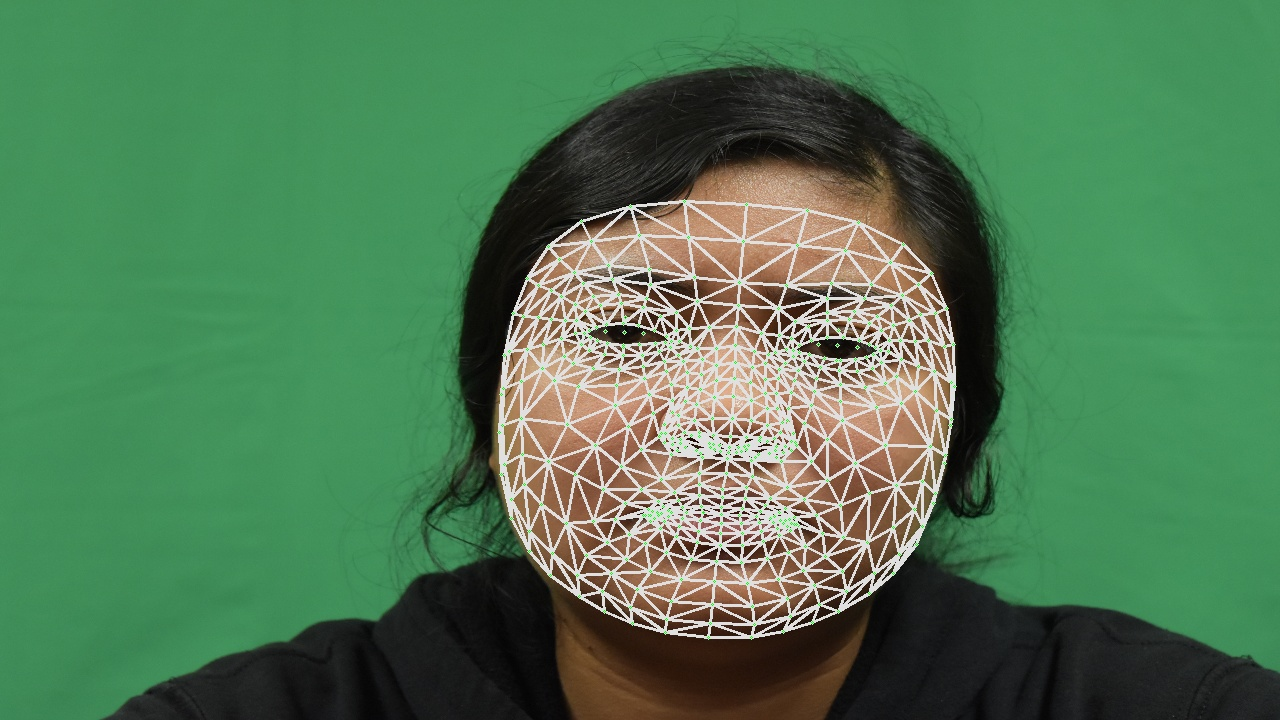

In [24]:
# Inicializa MediaPipe FaceMesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, refine_landmarks=True, min_detection_confidence=0.5)

# Carga la imagen
image_path = './Imagenes/SUJETOBASELINE_ENOJO_.jpG'  # Asegúrate de que la ruta sea correcta
image = cv2.imread(image_path)

if image is not None:
    # Redimensiona la imagen a 720p
    height, width = image.shape[:2]
    if height != 720 or width != 1280:
        image = cv2.resize(image, (1280, 720))

    # Convierte la imagen a RGB antes de procesarla
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Procesa la imagen para obtener los landmarks
    results = face_mesh.process(image_rgb)

    # Dibuja los landmarks faciales en la imagen
    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            mp.solutions.drawing_utils.draw_landmarks(
                image=image_rgb,  # Dibuja en la imagen RGB
                landmark_list=face_landmarks,
                connections=mp_face_mesh.FACEMESH_TESSELATION,
                landmark_drawing_spec=mp.solutions.drawing_utils.DrawingSpec(color=(0, 255, 0), thickness=1, circle_radius=1)
            )

    # Convierte la imagen procesada de RGB a BGR para guardar o mostrar
    image_bgr_with_landmarks = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)
    
    # Convertir la imagen a formato que IPython puede mostrar
    _, encoded_image = cv2.imencode('.JPG', image_bgr_with_landmarks)
    ipy_image = Image(data=encoded_image)

    display(ipy_image)
else:
    print(f"No se pudo cargar la imagen desde {image_path}")


Para validar la distribución de las emociones empleadas en el entrenamiento del modelo de evaluación, se realizó un análisis cuantitativo de las etiquetas utilizadas. Este análisis reveló que las emociones de enojo y neutralidad predominaron en el conjunto de datos, sugiriendo que estas emociones fueron las más representadas durante la fase de entrenamiento del modelo. Por contraste, las emociones de tristeza y felicidad se encontraron en menor medida dentro del conjunto de datos.

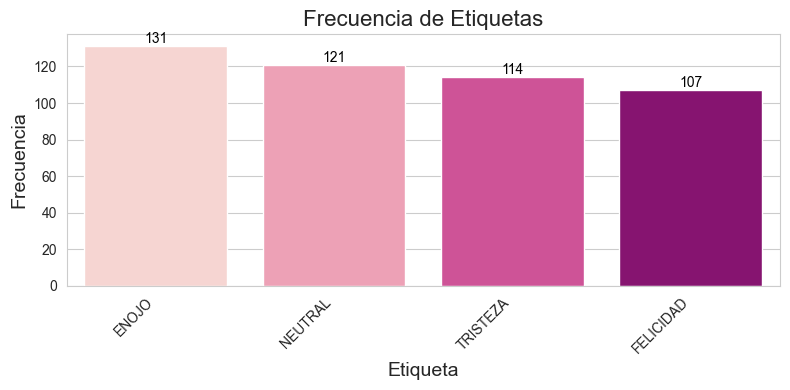

In [30]:
df_all_data_landmarks = pd.read_csv('./flat_landmarks_images_with_label.csv')

# Calcula la frecuencia de cada etiqueta
label_frequencies = df_all_data_landmarks['Label'].value_counts()

# Establece el estilo de Seaborn
sns.set_style("whitegrid")

# Define una paleta de colores en tonos morados
pink_palette = sns.color_palette("RdPu", len(label_frequencies))

# Crea la gráfica
plt.figure(figsize=(8, 4))
barplot = sns.barplot(x=label_frequencies.index, y=label_frequencies.values, palette=pink_palette)

# Añade título y etiquetas
plt.title('Frecuencia de Etiquetas', fontsize=16)
plt.xlabel('Etiqueta', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Rotación de etiquetas en el eje x para mayor legibilidad
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Añade etiquetas sobre las barras
for index, value in enumerate(label_frequencies):
    barplot.text(index, value, str(value), color='black', ha='center', va='bottom')

# Muestra la gráfica
plt.tight_layout()
plt.show()


## <span style="color:#EBBAF3;">Extracci&oacute;n de Caracter&iacute;sticas </span> 

Los vídeos implementados en el estudio tienen una duración aproximada de treinta segundos. Sin embargo, durante la fase de extracción de características, se identificó que la temporalidad completa de los vídeos generaría una cantidad excesiva de datos. Para optimizar el análisis, se decidió proceder con la truncación de los segmentos de vídeo a duraciones de entre cinco y doce segundos. La selección de estos intervalos específicos se basó en una evaluación rigurosa de los momentos en los que cada participante demostró la reacción más pronunciada y pertinente al estímulo visual presentado. 

In [25]:
# En este apartado se hizo un archivo .csv para ver en que momento se presento la emocion en base al estimulo visual.

path = './VideosSegmentados.csv'
segmentado_df = pd.read_csv(path)
print(segmentado_df.head())


                  SUJETO INICIO   FIN      LABEL
0      SUJETO1_ENOJO.MOV   0:03  0:14      ENOJO
1         SUJETO1_N1.MOV   0:10  0:20    NEUTRAL
2  SUJETO1_FELICIDAD.MOV   0:07  0:14  FELICIDAD
3   SUJETO1_TRISTEZA.MOV   0:03  0:13   TRISTEZA
4      SUJETO2_ENOJO.MOV   0:05  0:15      ENOJO


El fragmento de código que se presenta a continuación está diseñado para ejecutar el procedimiento de segmentación de los archivos de vídeo de manera automatizada, utilizando como referencia el documento en formato CSV anterior.

In [37]:
# Cambia esta variable por la ruta a tu archivo CSV
csv_file = './VideosSegmentados.csv'

# Cambia esta variable por la ruta a la carpeta donde están tus videos originales
videos_folder = './Videos/'

# Ruta a la carpeta donde quieres guardar los videos segmentados
segmented_videos_folder = './VideosSegmentados'

# Crea la carpeta para los videos segmentados si no existe
if not os.path.exists(segmented_videos_folder):
    os.makedirs(segmented_videos_folder)

df = pd.read_csv(csv_file)

# Itera sobre cada fila del DataFrame
for index, row in df.iterrows():
    video_path = os.path.join(videos_folder, row['SUJETO'])
    inicio = row['INICIO']
    fin = row['FIN']
    
    # Carga el video
    clip = VideoFileClip(video_path)
    
    # Convierte los tiempos de inicio y fin a segundos
    start_seconds = int(inicio.split(':')[0]) * 60 + int(inicio.split(':')[1])
    end_seconds = int(fin.split(':')[0]) * 60 + int(fin.split(':')[1])
    
    # Verifica que el tiempo de inicio y fin estén dentro de la duración del video
    if start_seconds >= clip.duration or end_seconds > clip.duration:
        print(f"Error en {video_path}: El tiempo de inicio o fin está fuera de la duración del video.")
        continue  # Salta este video y continúa con el siguiente

    # Segmenta el video
    new_clip = clip.subclip(start_seconds, end_seconds)
    
    # Segmenta el video
    new_clip = clip.subclip(start_seconds, end_seconds)
    
    # Define la ruta del nuevo video segmentado, incluyendo la carpeta VideosSegmentados
    new_video_filename = os.path.splitext(row['SUJETO'])[0] + '_segmentado.mp4'
    new_video_path = os.path.join(segmented_videos_folder, new_video_filename)
    
    # Escribe el video segmentado en el disco
    new_clip.write_videofile(new_video_path, codec='libx264', audio_codec='aac')

    # Libera recursos
    clip.close()
    new_clip.close()


Moviepy - Building video ./VideosSegmentados\SUJETO1_ENOJO_segmentado.mp4.
MoviePy - Writing audio in SUJETO1_ENOJO_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO1_ENOJO_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO1_ENOJO_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO1_N1_segmentado.mp4.
MoviePy - Writing audio in SUJETO1_N1_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO1_N1_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO1_N1_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO1_FELICIDAD_segmentado.mp4.
MoviePy - Writing audio in SUJETO1_FELICIDAD_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO1_FELICIDAD_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO1_FELICIDAD_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO1_TRISTEZA_segmentado.mp4.
MoviePy - Writing audio in SUJETO1_TRISTEZA_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO1_TRISTEZA_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO1_TRISTEZA_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO2_ENOJO_segmentado.mp4.
MoviePy - Writing audio in SUJETO2_ENOJO_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO2_ENOJO_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO2_ENOJO_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO2_N1_segmentado.mp4.
MoviePy - Writing audio in SUJETO2_N1_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO2_N1_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO2_N1_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO2_FELICIDAD_segmentado.mp4.
MoviePy - Writing audio in SUJETO2_FELICIDAD_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO2_FELICIDAD_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO2_FELICIDAD_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO2_TRISTEZA_segmentado.mp4.
MoviePy - Writing audio in SUJETO2_TRISTEZA_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO2_TRISTEZA_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO2_TRISTEZA_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO3_ENOJO_segmentado.mp4.
MoviePy - Writing audio in SUJETO3_ENOJO_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO3_ENOJO_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO3_ENOJO_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO3_N1_segmentado.mp4.
MoviePy - Writing audio in SUJETO3_N1_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO3_N1_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO3_N1_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO3_FELICIDAD_segmentado.mp4.
MoviePy - Writing audio in SUJETO3_FELICIDAD_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO3_FELICIDAD_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO3_FELICIDAD_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO3_TRISTEZA_segmentado.mp4.
MoviePy - Writing audio in SUJETO3_TRISTEZA_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO3_TRISTEZA_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO3_TRISTEZA_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO4_ENOJO_segmentado.mp4.
MoviePy - Writing audio in SUJETO4_ENOJO_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO4_ENOJO_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO4_ENOJO_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO4_N1_segmentado.mp4.
MoviePy - Writing audio in SUJETO4_N1_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO4_N1_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO4_N1_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO4_FELICIDAD_segmentado.mp4.
MoviePy - Writing audio in SUJETO4_FELICIDAD_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO4_FELICIDAD_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO4_FELICIDAD_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO4_TRISTEZA_segmentado.mp4.
MoviePy - Writing audio in SUJETO4_TRISTEZA_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO4_TRISTEZA_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO4_TRISTEZA_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO5_ENOJO_segmentado.mp4.
MoviePy - Writing audio in SUJETO5_ENOJO_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO5_ENOJO_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO5_ENOJO_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO5_N1_segmentado.mp4.
MoviePy - Writing audio in SUJETO5_N1_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO5_N1_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO5_N1_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO5_FELICIDAD_segmentado.mp4.
MoviePy - Writing audio in SUJETO5_FELICIDAD_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO5_FELICIDAD_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO5_FELICIDAD_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO5_TRISTEZA_segmentado.mp4.
MoviePy - Writing audio in SUJETO5_TRISTEZA_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO5_TRISTEZA_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO5_TRISTEZA_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO6_ENOJO_segmentado.mp4.
MoviePy - Writing audio in SUJETO6_ENOJO_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO6_ENOJO_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO6_ENOJO_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO6_N1_segmentado.mp4.
MoviePy - Writing audio in SUJETO6_N1_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO6_N1_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO6_N1_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO6_FELICIDAD_segmentado.mp4.
MoviePy - Writing audio in SUJETO6_FELICIDAD_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO6_FELICIDAD_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO6_FELICIDAD_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO6_TRISTEZA_segmentado.mp4.
MoviePy - Writing audio in SUJETO6_TRISTEZA_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO6_TRISTEZA_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO6_TRISTEZA_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO7_ENOJO_segmentado.mp4.
MoviePy - Writing audio in SUJETO7_ENOJO_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO7_ENOJO_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO7_ENOJO_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO7_N1_segmentado.mp4.
MoviePy - Writing audio in SUJETO7_N1_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO7_N1_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO7_N1_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO7_FELICIDAD_segmentado.mp4.
MoviePy - Writing audio in SUJETO7_FELICIDAD_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO7_FELICIDAD_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO7_FELICIDAD_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO7_TRISTEZA_segmentado.mp4.
MoviePy - Writing audio in SUJETO7_TRISTEZA_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO7_TRISTEZA_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO7_TRISTEZA_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO8_ENOJO_segmentado.mp4.
MoviePy - Writing audio in SUJETO8_ENOJO_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO8_ENOJO_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO8_ENOJO_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO8_N1_segmentado.mp4.
MoviePy - Writing audio in SUJETO8_N1_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO8_N1_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO8_N1_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO8_FELICIDAD_segmentado.mp4.
MoviePy - Writing audio in SUJETO8_FELICIDAD_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO8_FELICIDAD_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO8_FELICIDAD_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO8_TRISTEZA_segmentado.mp4.
MoviePy - Writing audio in SUJETO8_TRISTEZA_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO8_TRISTEZA_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO8_TRISTEZA_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO9_ENOJO_segmentado.mp4.
MoviePy - Writing audio in SUJETO9_ENOJO_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO9_ENOJO_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO9_ENOJO_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO9_N1_segmentado.mp4.
MoviePy - Writing audio in SUJETO9_N1_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO9_N1_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO9_N1_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO9_FELICIDAD_segmentado.mp4.
MoviePy - Writing audio in SUJETO9_FELICIDAD_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO9_FELICIDAD_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO9_FELICIDAD_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO9_TRISTEZA_segmentado.mp4.
MoviePy - Writing audio in SUJETO9_TRISTEZA_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO9_TRISTEZA_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO9_TRISTEZA_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO10_ENOJO_segmentado.mp4.
MoviePy - Writing audio in SUJETO10_ENOJO_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO10_ENOJO_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO10_ENOJO_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO10_N1_segmentado.mp4.
MoviePy - Writing audio in SUJETO10_N1_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO10_N1_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO10_N1_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO10_FELICIDAD_segmentado.mp4.
MoviePy - Writing audio in SUJETO10_FELICIDAD_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO10_FELICIDAD_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO10_FELICIDAD_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO10_TRISTEZA_segmentado.mp4.
MoviePy - Writing audio in SUJETO10_TRISTEZA_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO10_TRISTEZA_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO10_TRISTEZA_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO11_ENOJO_segmentado.mp4.
MoviePy - Writing audio in SUJETO11_ENOJO_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO11_ENOJO_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO11_ENOJO_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO11_N1_segmentado.mp4.
MoviePy - Writing audio in SUJETO11_N1_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO11_N1_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO11_N1_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO11_FELICIDAD_segmentado.mp4.
MoviePy - Writing audio in SUJETO11_FELICIDAD_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO11_FELICIDAD_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO11_FELICIDAD_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO11_TRISTEZA_segmentado.mp4.
MoviePy - Writing audio in SUJETO11_TRISTEZA_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO11_TRISTEZA_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO11_TRISTEZA_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO12_ENOJO_segmentado.mp4.
MoviePy - Writing audio in SUJETO12_ENOJO_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO12_ENOJO_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO12_ENOJO_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO12_N1_segmentado.mp4.
MoviePy - Writing audio in SUJETO12_N1_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO12_N1_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO12_N1_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO12_FELICIDAD_segmentado.mp4.
MoviePy - Writing audio in SUJETO12_FELICIDAD_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO12_FELICIDAD_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO12_FELICIDAD_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO12_TRISTEZA_segmentado.mp4.
MoviePy - Writing audio in SUJETO12_TRISTEZA_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO12_TRISTEZA_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO12_TRISTEZA_segmentado.mp4


Considerando la implementación de la segmentación de los vídeos, se observa que la tasa de captura es de 30 fotogramas por segundo, resultando en un total de 150 a 360 fotogramas para segmentos de duración comprendida entre 5 y 12 segundos, respectivamente. Para optimizar el análisis y manejar eficientemente la magnitud de los datos, se adoptó una metodología selectiva de extracción de fotogramas. Esta consistió en la retención de un único fotograma por cada conjunto de 30 de forma secuencial, disminuyendo la cantidad total de fotogramas a ser evaluados. Este criterio se aplicó a todos los vídeos segmentados, estableciendo así un paradigma estandarizado para el procesamiento preliminar de los datos visuales.

In [38]:
# Ruta a la carpeta que contiene los videos
videos_folder = './VideosSegmentados/'

# Ruta a la carpeta donde se guardarán las imágenes
images_folder = './Imagenes/'

# Crea la carpeta para las imágenes si no existe
if not os.path.exists(images_folder):
    os.makedirs(images_folder)

# Recorre todos los archivos en la carpeta de videos
for video_file in os.listdir(videos_folder):
    video_path = os.path.join(videos_folder, video_file)
    
    # Verifica si el archivo es un video abriéndolo con OpenCV
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"No se pudo abrir el video {video_file}")
        continue

    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Extrae un frame cada 30 frames
        if frame_count % 30 == 0:
            frame_filename = f"{os.path.splitext(video_file)[0]}_frame{frame_count}.jpg"
            frame_path = os.path.join(images_folder, frame_filename)
            cv2.imwrite(frame_path, frame)
            print(f"Frame guardado: {frame_filename}")

        frame_count += 1

    # Libera el objeto cap y cierra todas las ventanas de OpenCV
    cap.release()

cv2.destroyAllWindows()


Frame guardado: SUJETO10_ENOJO_segmentado_frame0.jpg
Frame guardado: SUJETO10_ENOJO_segmentado_frame30.jpg
Frame guardado: SUJETO10_ENOJO_segmentado_frame60.jpg
Frame guardado: SUJETO10_ENOJO_segmentado_frame90.jpg
Frame guardado: SUJETO10_ENOJO_segmentado_frame120.jpg
Frame guardado: SUJETO10_ENOJO_segmentado_frame150.jpg
Frame guardado: SUJETO10_ENOJO_segmentado_frame180.jpg
Frame guardado: SUJETO10_ENOJO_segmentado_frame210.jpg
Frame guardado: SUJETO10_ENOJO_segmentado_frame240.jpg
Frame guardado: SUJETO10_ENOJO_segmentado_frame270.jpg
Frame guardado: SUJETO10_ENOJO_segmentado_frame300.jpg
Frame guardado: SUJETO10_FELICIDAD_segmentado_frame0.jpg
Frame guardado: SUJETO10_FELICIDAD_segmentado_frame30.jpg
Frame guardado: SUJETO10_FELICIDAD_segmentado_frame60.jpg
Frame guardado: SUJETO10_FELICIDAD_segmentado_frame90.jpg
Frame guardado: SUJETO10_FELICIDAD_segmentado_frame120.jpg
Frame guardado: SUJETO10_FELICIDAD_segmentado_frame150.jpg
Frame guardado: SUJETO10_FELICIDAD_segmentado_frame

Con la colección de imágenes derivadas de los fotogramas seleccionados anteriormente, se procedió a implementar la tecnología de FaceMesh sobre cada uno de los segmentos de vídeo. Esto implicó la detección y extracción de puntos clave faciales, abarcando la totalidad del rostro en cada imagen. Los datos obtenidos fueron registrados y almacenados en una estructura de datos tabular, es decir, un dataframe.

In [6]:
mp_face_mesh = mp.solutions.face_mesh

landmarks_data = []

# Carpeta con las imagenes
images_folder = './Imagenes/'

# Inicializa FaceMesh con las opciones deseadas
with mp_face_mesh.FaceMesh(
        max_num_faces=1,
        refine_landmarks=True,
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5) as face_mesh:

    # Lista todos los archivos en la carpeta de imágenes
    image_files = [f for f in os.listdir(images_folder) if f.endswith('.jpg') or f.endswith('.png')]

    # Procesa cada imagen que cumple con el criterio
    for image_file in image_files:
        image_path = os.path.join(images_folder, image_file)
        image = cv2.imread(image_path)
        
        # Verifica si la imagen se cargó correctamente
        if image is None:
            print(f"No se pudo cargar la imagen {image_file}")
            continue
        
        # Cambia la resolución de la imagen y la convierte a RGB
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Procesa la imagen para obtener los landmarks
        results = face_mesh.process(image_rgb)
        
        # Extrae landmarks faciales si están disponibles
        if results.multi_face_landmarks:
            # Cada imagen dará lugar a una sola fila con todos los landmarks
            row = {'Image': image_file}
            for landmark_id, landmark in enumerate(results.multi_face_landmarks[0].landmark):
                # Añade las coordenadas x, y de cada landmark al diccionario de la fila
                row[f'K{landmark_id + 1}X'] = landmark.x
                row[f'K{landmark_id + 1}Y'] = landmark.y
            
            # Extrae el label del nombre del archivo
            label = image_file.split('_')[1]  # Esto toma el elemento entre el primer y segundo '_'
            if label == 'N1':  # Cambia 'N1' a 'NEUTRAL'
                label = 'NEUTRAL'
            row['Label'] = label
            
            landmarks_data.append(row)

# Crea un DataFrame a partir de la lista de datos
df_flat_landmarks = pd.DataFrame(landmarks_data)

# Muestra los primeros registros del DataFrame
print(df_flat_landmarks.head())


                                    Image       K1X       K1Y       K2X  \
0    SUJETO10_ENOJO_segmentado_frame0.jpg  0.516717  0.862611  0.525122   
1  SUJETO10_ENOJO_segmentado_frame120.jpg  0.522165  0.873315  0.534889   
2  SUJETO10_ENOJO_segmentado_frame150.jpg  0.521257  0.869050  0.532735   
3  SUJETO10_ENOJO_segmentado_frame180.jpg  0.519951  0.869113  0.532665   
4  SUJETO10_ENOJO_segmentado_frame210.jpg  0.522861  0.869178  0.534696   

        K2Y       K3X       K3Y       K4X       K4Y       K5X  ...     K474Y  \
0  0.781059  0.522194  0.800093  0.520307  0.707113  0.527029  ...  0.654642   
1  0.798453  0.530828  0.816012  0.530545  0.722064  0.537171  ...  0.667019   
2  0.793808  0.528710  0.811547  0.528189  0.717880  0.534973  ...  0.667484   
3  0.793192  0.528782  0.810866  0.527933  0.718591  0.534852  ...  0.671306   
4  0.794747  0.530758  0.812396  0.530206  0.719392  0.536961  ...  0.669738   

      K475X     K475Y     K476X     K476Y     K477X     K477Y     K4

Se muestra el dataframe resultante del proceso de extracción y catalogación de los puntos clave faciales obtenidos mediante la aplicación de FaceMesh a las imágenes seleccionadas de los segmentos de vídeo.

In [31]:
df_flat_landmarks

,Image,K1X,K1Y,K2X,K2Y,K3X,K3Y,K4X,K4Y,K5X,...,K474Y,K475X,K475Y,K476X,K476Y,K477X,K477Y,K478X,K478Y,Label
0,SUJETO10_ENOJO_segmentado_frame0.jpg,0.516717,0.862611,0.525122,0.781059,0.522194,0.800093,0.520307,0.707113,0.527029,...,0.654642,0.597166,0.657380,0.587159,0.638631,0.575269,0.651748,0.585243,0.670582,ENOJO
1,SUJETO10_ENOJO_segmentado_frame120.jpg,0.522165,0.873315,0.534889,0.798453,0.530828,0.816012,0.530545,0.722064,0.537171,...,0.667019,0.605121,0.669919,0.595619,0.650519,0.583513,0.663937,0.593000,0.683557,ENOJO
2,SUJETO10_ENOJO_segmentado_frame150.jpg,0.521257,0.869050,0.532735,0.793808,0.528710,0.811547,0.528189,0.717880,0.534973,...,0.667484,0.604407,0.670765,0.594810,0.650166,0.582683,0.663929,0.592320,0.684695,ENOJO
3,SUJETO10_ENOJO_segmentado_frame180.jpg,0.519951,0.869113,0.532665,0.793192,0.528782,0.810866,0.527933,0.718591,0.534852,...,0.671306,0.602347,0.674140,0.593610,0.656219,0.582534,0.668459,0.591239,0.686257,ENOJO
4,SUJETO10_ENOJO_segmentado_frame210.jpg,0.522861,0.869178,0.534696,0.794747,0.530758,0.812396,0.530206,0.719392,0.536961,...,0.669738,0.605531,0.672815,0.596163,0.653849,0.584328,0.666554,0.593704,0.685507,ENOJO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,SUJETO9_TRISTEZA_segmentado_frame90.jpg,0.466474,0.795463,0.471724,0.722081,0.469866,0.742865,0.465500,0.650051,0.473138,...,0.608497,0.550433,0.611247,0.540197,0.591266,0.527597,0.605644,0.537758,0.625812,TRISTEZA
469,SUJETOBASELINE_ENOJO_.jpg,0.560945,0.688971,0.530364,0.628595,0.533198,0.660879,0.518769,0.565666,0.530013,...,0.527220,0.632946,0.532235,0.623366,0.512396,0.607285,0.521528,0.617144,0.540823,ENOJO
470,SUJETOBASELINE_FELICIDAD_.jpg,0.540443,0.696647,0.544350,0.629946,0.542824,0.660056,0.534408,0.550628,0.545698,...,0.508232,0.653438,0.510210,0.637066,0.486759,0.619192,0.506253,0.635599,0.529625,FELICIDAD
471,SUJETOBASELINE_NEUTRAL_.jpg,0.523542,0.599596,0.524195,0.508241,0.523063,0.550286,0.514287,0.440016,0.525274,...,0.423212,0.636259,0.426738,0.621623,0.403182,0.603425,0.419761,0.617948,0.443265,NEUTRAL


Para garantizar la eficacia y conservación segura de los datos obtenidos, se tomó la decisión de exportar el dataframe conformado por los puntos clave faciales a un archivo en formato CSV. 

In [7]:
# Guarda el DataFrame a un archivo CSV
df_flat_landmarks.to_csv('flat_landmarks_images_with_label.csv', index=False)

## <span style="color:#EBBAF3;">Ganancia de Informaci&oacute;n</span> 

Ante la amplia cantidad de características derivadas de los puntos clave faciales, se identificó la ganancia de información como una metodología para discernir la relevancia de cada atributo y utilizarlo en el modelo de evaluaci&oacute;n.

In [2]:
# Se selecciono otro archivo csv ya que en este punto se excluye al participante 8.
csv_file_path = 'nuevo_flat_landmarks_images_with_label.csv'
df = pd.read_csv(csv_file_path)

# Muestra las primeras 5 filas del DataFrame para verificar que se haya leído correctamente.
print(df.head())

                                    Image       K1X       K1Y       K2X  \
0    SUJETO10_ENOJO_segmentado_frame0.jpg  0.516717  0.862611  0.525122   
1  SUJETO10_ENOJO_segmentado_frame120.jpg  0.522165  0.873315  0.534889   
2  SUJETO10_ENOJO_segmentado_frame150.jpg  0.521257  0.869050  0.532735   
3  SUJETO10_ENOJO_segmentado_frame180.jpg  0.519951  0.869113  0.532665   
4  SUJETO10_ENOJO_segmentado_frame210.jpg  0.522861  0.869178  0.534696   

        K2Y       K3X       K3Y       K4X       K4Y       K5X  ...     K474Y  \
0  0.781059  0.522194  0.800093  0.520307  0.707113  0.527029  ...  0.654642   
1  0.798453  0.530828  0.816012  0.530545  0.722064  0.537171  ...  0.667019   
2  0.793808  0.528710  0.811547  0.528189  0.717880  0.534973  ...  0.667484   
3  0.793192  0.528782  0.810866  0.527933  0.718591  0.534852  ...  0.671306   
4  0.794747  0.530758  0.812396  0.530206  0.719392  0.536961  ...  0.669738   

      K475X     K475Y     K476X     K476Y     K477X     K477Y     K4

En el proceso de aplicar ganancia de información para evaluar la relevancia de las distintas características extraídas de los puntos clave faciales, se tomó la decisión de excluir ciertas columnas del marco de datos. Específicamente, no se consideraron para el análisis las columnas que contenían el nombre del vídeo correspondiente ni las etiquetas de las emociones a las cuales los sujetos estaban reaccionando. Esto con el fin de asegurar que la evaluación de la importancia de las características se basara exclusivamente en la información cuantitativa derivada de las respuestas faciales.

In [3]:
X = df.iloc[:, 1:-1]
Y = df.iloc[:, -1]

En esta sección se procede con la aplicación de ganancia de información al conjunto de datos, con el propósito explícito de discernir cuáles de las características extraídas son más importantes para su inclusión en el modelo de evaluación.

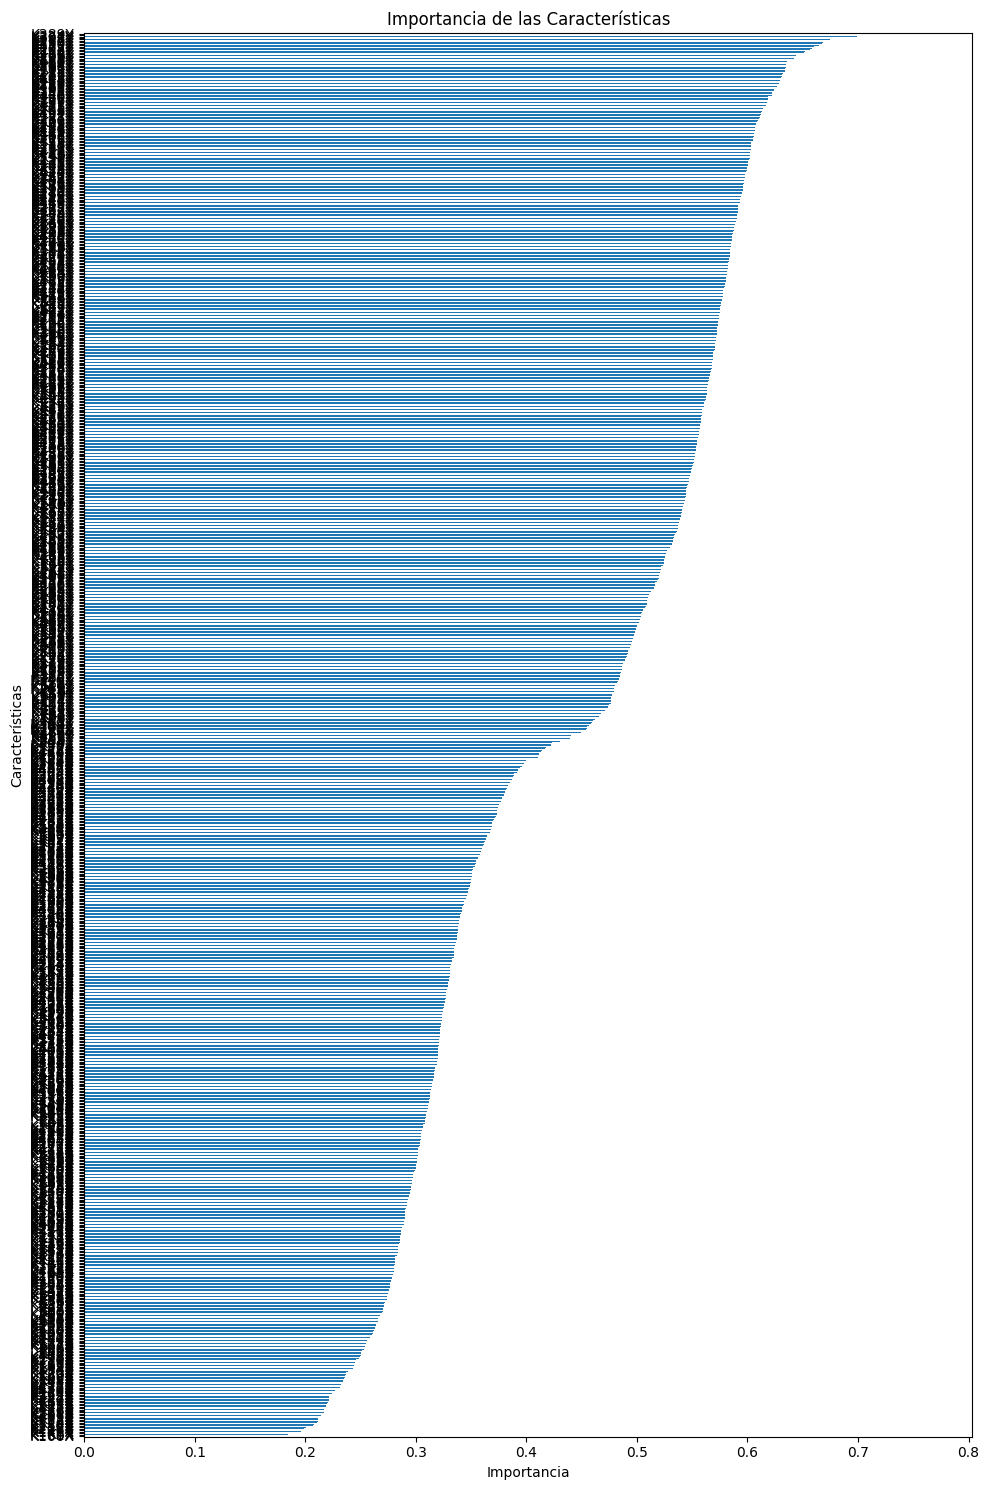

In [6]:
# Suponiendo que X y Y ya están definidos y son tu conjunto de datos y etiquetas, respectivamente
X_new = mutual_info_classif(X, Y)

# Ajusta las etiquetas de las columnas para que coincidan con las dimensiones de X
feat_imp = pd.Series(X_new, df.columns[1:len(df.columns)-1])

# Ordena las características por importancia y grafica
feat_imp_sorted = feat_imp.sort_values()

# Graficar la importancia de las características
plt.figure(figsize=(10, 15))  # Ajusta el tamaño según sea necesario
feat_imp_sorted.plot(kind='barh')

# Rotar las etiquetas
plt.gca().tick_params(axis='y', labelrotation=0)  # Cambia a 45 o 90 si es necesario

# Mejora la legibilidad del gráfico
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características')
plt.tight_layout()  # Asegura que todo encaje sin superponerse

plt.show()


Tras la evaluación detallada de la gráfica que ilustra la distribución de la ganancia de información para las diversas características extraídas, se estableció un umbral de selección entre 0.4 y 0.5. Este criterio se basa en que, dentro de este rango, se identifican las características que aportan un valor significativo al modelo de evaluación. Posteriormente estas características, consideradas como las más importantes para el modelo de evaluación, se imprimieron para su revisión y consideración detallada en la fase del modelo de evaluaci&oacute;n. 

In [7]:
# Calcular el valor medio entre 0.4 y 0.5
umbral = (0.4 + 0.5) / 2

# Filtrar las características con valores mayores al umbral
selected_features = df.columns[np.where(X_new > umbral)].tolist()

# Mostrar las características seleccionadas
print("Características seleccionadas con valor mayor a", umbral, ":", selected_features)
features_df_info_gain = df[["Image"] + selected_features]
features_df_info_gain

Características seleccionadas con valor mayor a 0.45 : ['K1X', 'K2X', 'K3X', 'K4X', 'K5X', 'K6X', 'K7X', 'K8X', 'K9X', 'K10X', 'K11X', 'K12X', 'K13X', 'K14X', 'K15X', 'K17X', 'K18X', 'K19X', 'K20X', 'K21X', 'K22X', 'K23X', 'K24X', 'K25X', 'K26X', 'K27X', 'K28X', 'K29X', 'K30X', 'K31X', 'K32X', 'K33X', 'K34X', 'K35X', 'K36X', 'K37X', 'K38X', 'K39X', 'K40X', 'K41X', 'K42X', 'K43X', 'K44X', 'K45X', 'K46X', 'K47X', 'K48X', 'K49X', 'K50X', 'K51X', 'K52X', 'K53X', 'K54X', 'K55X', 'K56X', 'K57X', 'K58X', 'K59X', 'K60X', 'K61X', 'K62X', 'K63X', 'K64X', 'K65X', 'K66X', 'K67X', 'K68X', 'K69X', 'K70X', 'K71X', 'K72X', 'K73X', 'K74X', 'K75X', 'K76X', 'K77X', 'K78X', 'K79X', 'K80X', 'K81X', 'K82X', 'K83X', 'K84X', 'K85X', 'K86X', 'K87X', 'K88X', 'K89X', 'K90X', 'K91X', 'K92X', 'K93X', 'K94X', 'K95X', 'K96X', 'K97X', 'K98X', 'K99X', 'K100X', 'K101X', 'K102X', 'K103X', 'K104X', 'K105X', 'K106X', 'K107X', 'K108X', 'K109X', 'K110X', 'K111X', 'K112X', 'K113X', 'K114X', 'K115X', 'K116X', 'K117X', 'K118X'

,Image,K1X,K2X,K3X,K4X,K5X,K6X,K7X,K8X,K9X,...,K469X,K470X,K471X,K472X,K473X,K474X,K475X,K476X,K477X,K478X
0,SUJETO10_ENOJO_segmentado_frame0.jpg,0.516717,0.525122,0.522194,0.520307,0.527029,0.528918,0.533020,0.452462,0.535847,...,0.470921,0.482739,0.472407,0.459043,0.469388,0.586153,0.597166,0.587159,0.575269,0.585243
1,SUJETO10_ENOJO_segmentado_frame120.jpg,0.522165,0.534889,0.530828,0.530545,0.537171,0.539290,0.543733,0.461720,0.547566,...,0.481572,0.493419,0.483559,0.469564,0.479480,0.594279,0.605121,0.595619,0.583513,0.593000
2,SUJETO10_ENOJO_segmentado_frame150.jpg,0.521257,0.532735,0.528710,0.528189,0.534973,0.536958,0.540957,0.460520,0.544457,...,0.479952,0.491748,0.481892,0.467997,0.477911,0.593558,0.604407,0.594810,0.582683,0.592320
3,SUJETO10_ENOJO_segmentado_frame180.jpg,0.519951,0.532665,0.528782,0.527933,0.534852,0.536787,0.540639,0.457588,0.544010,...,0.477036,0.488321,0.478554,0.465583,0.475401,0.592393,0.602347,0.593610,0.582534,0.591239
4,SUJETO10_ENOJO_segmentado_frame210.jpg,0.522861,0.534696,0.530758,0.530206,0.536961,0.538989,0.543086,0.461393,0.546634,...,0.479272,0.490770,0.480933,0.467618,0.477526,0.594907,0.605531,0.596163,0.584328,0.593704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,SUJETO9_TRISTEZA_segmentado_frame90.jpg,0.466482,0.471708,0.469852,0.465488,0.473121,0.474592,0.477786,0.395964,0.480180,...,0.414909,0.427527,0.415739,0.402280,0.414082,0.539010,0.550449,0.540197,0.527578,0.537758
427,SUJETOBASELINE_ENOJO_.jpg,0.561024,0.530492,0.533249,0.518866,0.530152,0.530412,0.532334,0.443150,0.531158,...,0.487858,0.501044,0.487480,0.474189,0.488068,0.620444,0.632968,0.623370,0.607300,0.617171
428,SUJETOBASELINE_FELICIDAD_.jpg,0.541608,0.544632,0.543088,0.534596,0.545955,0.547600,0.551336,0.433186,0.554227,...,0.461482,0.477428,0.462335,0.445347,0.460594,0.636094,0.653138,0.636881,0.619083,0.635373
429,SUJETOBASELINE_NEUTRAL_.jpg,0.522203,0.523489,0.522433,0.513654,0.524579,0.526227,0.530402,0.413202,0.532774,...,0.443750,0.459844,0.443672,0.427459,0.443787,0.619942,0.636537,0.621765,0.603456,0.618157


Para facilitar la interpretación de las características más importantes identificadas a través del análisis de ganancia de información, se tomó la decisión de visualizar gráficamente las imágenes correspondientes, anotadas con los puntos clave faciales relevantes. La impresión de estas imágenes proporciona una referencia visual que facilita el entendimiento de las dinámicas faciales que el modelo considera más críticas.

In [5]:
df = pd.read_csv('./nuevo_flat_landmarks_images_with_label.csv')
# Define una función para dibujar keypoints.
def draw_keypoints(image, row):
    for i in range(1, 469):
        # Los keypoints están en las columnas 'K{i}X' y 'K{i}Y'
        x = int(row[f'K{i}X'] * image.shape[1])
        y = int(row[f'K{i}Y'] * image.shape[0])
        cv2.circle(image, (x, y), 8, (240, 255, 100), -1)
    return image

# Recorre cada fila en el DataFrame.
for index, row in df.iterrows():
    image_path = './Imagenes/' + row['Image']  # Asegúrate de que la ruta es correcta.
    image = cv2.imread(image_path)
    
    # Verifica si la imagen fue cargada exitosamente.
    if image is None:
        print(f"No se pudo cargar la imagen {row['Image']}")
        continue
    
    # Dibuja los keypoints en la imagen.
    image_with_keypoints = draw_keypoints(image, row)
    
    image_720p = cv2.resize(image_with_keypoints, (640, 480))
    # Muestra la imagen con los keypoints.
    cv2.imshow('Image with Keypoints', image_720p)
    cv2.waitKey(0)  # Espera a que se presione una tecla para continuar con la siguiente imagen.

cv2.destroyAllWindows()


## <span style="color:#EBBAF3;">Modelos a Evaluar</span> 

Para iniciar la evaluación de las características, se procede definiendo la matriz de características X, excluyendo las columnas que contienen el nombre del video y las etiquetas correspondientes a las emociones observadas. Esto garantiza que el análisis se centre únicamente en las variables numéricas que representan los puntos clave faciales, sin influencia de variables categóricas o identificativas que no contribuyen al proceso de modelado predictivo. 

In [9]:
X= features_df_info_gain.iloc[:, 1:-1]

Posteriormente, se realiza la impresión de la matriz X para ofrecer una vista preliminar de los datos que están siendo considerados para el análisis.

In [10]:
X

,K1X,K2X,K3X,K4X,K5X,K6X,K7X,K8X,K9X,K10X,...,K468X,K469X,K470X,K471X,K472X,K473X,K474X,K475X,K476X,K477X
0,0.516717,0.525122,0.522194,0.520307,0.527029,0.528918,0.533020,0.452462,0.535847,0.538001,...,0.616480,0.470921,0.482739,0.472407,0.459043,0.469388,0.586153,0.597166,0.587159,0.575269
1,0.522165,0.534889,0.530828,0.530545,0.537171,0.539290,0.543733,0.461720,0.547566,0.550350,...,0.623925,0.481572,0.493419,0.483559,0.469564,0.479480,0.594279,0.605121,0.595619,0.583513
2,0.521257,0.532735,0.528710,0.528189,0.534973,0.536958,0.540957,0.460520,0.544457,0.547091,...,0.622753,0.479952,0.491748,0.481892,0.467997,0.477911,0.593558,0.604407,0.594810,0.582683
3,0.519951,0.532665,0.528782,0.527933,0.534852,0.536787,0.540639,0.457588,0.544010,0.546568,...,0.623212,0.477036,0.488321,0.478554,0.465583,0.475401,0.592393,0.602347,0.593610,0.582534
4,0.522861,0.534696,0.530758,0.530206,0.536961,0.538989,0.543086,0.461393,0.546634,0.549291,...,0.625705,0.479272,0.490770,0.480933,0.467618,0.477526,0.594907,0.605531,0.596163,0.584328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,0.466482,0.471708,0.469852,0.465488,0.473121,0.474592,0.477786,0.395964,0.480180,0.481841,...,0.567972,0.414909,0.427527,0.415739,0.402280,0.414082,0.539010,0.550449,0.540197,0.527578
427,0.561024,0.530492,0.533249,0.518866,0.530152,0.530412,0.532334,0.443150,0.531158,0.530427,...,0.658335,0.487858,0.501044,0.487480,0.474189,0.488068,0.620444,0.632968,0.623370,0.607300
428,0.541608,0.544632,0.543088,0.534596,0.545955,0.547600,0.551336,0.433186,0.554227,0.555783,...,0.680875,0.461482,0.477428,0.462335,0.445347,0.460594,0.636094,0.653138,0.636881,0.619083
429,0.522203,0.523489,0.522433,0.513654,0.524579,0.526227,0.530402,0.413202,0.532774,0.534236,...,0.663445,0.443750,0.459844,0.443672,0.427459,0.443787,0.619942,0.636537,0.621765,0.603456


Antes de proceder ingresar las características al modelo de evaluación, es importante codificar las etiquetas de las clases en un formato adecuado para el análisis. Esto implica la transformación de las etiquetas categóricas en una serie de valores numéricos discretos, que oscilan entre 0 y el número total de clases menos uno. Esta codificación se realiza para garantizar la compatibilidad con los algoritmos de aprendizaje automático, que requieren entradas numéricas para realizar cálculos efectivos.

In [11]:
encoder = LabelEncoder()
y_encode = encoder.fit_transform(Y)
y_encode

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,

Para determinar el clasificador más adecuado para el modelo final de evaluación, se optó por la implementación y comparación de cinco clasificadores distintos, los cuales son los siguientes:

In [12]:
names = [
    "Nearest Neighbors",
    "Naive Bayes",
    "AdaBoost",
    "Gradient Boosting",
    "Random Forest"
]
modelos = [
    KNeighborsClassifier(n_neighbors=6),
    GaussianNB(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42),
    RandomForestClassifier(n_estimators=100, random_state=24)
]

Para asegurar una evaluación rigurosa y objetiva de la efectividad de los clasificadores seleccionados, se implementó un procedimiento de validación cruzada.

In [13]:
def validacion_cruzada(model, X, y):
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    precision_scores = []
    recall_scores = []
    f1_scores = []
    accuracies = []

    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)

        X_test_np = X_test.values
        y_pred = model.predict(X_test_np)

        precision = precision_score(y_test, y_pred, average='weighted')
        precision_scores.append(precision)

        recall = recall_score(y_test, y_pred, average='weighted')
        recall_scores.append(recall)

        f1 = f1_score(y_test, y_pred, average='weighted')
        f1_scores.append(f1)

        accuracy = model.score(X_test, y_test)
        accuracies.append(accuracy)

    return np.mean(precision_scores), np.mean(recall_scores), np.mean(f1_scores), np.mean(accuracies)

resultados = []

for nombre, modelo in zip(names, modelos):
    precision, recall, f1, accuracy = validacion_cruzada(model=modelo, X=X, y=y_encode)
    resultados.append({"nombre": nombre, "precision": precision, "recall": recall, "f1_score": f1, "accuracy": accuracy})

df_resultados = pd.DataFrame(resultados)

Tras la aplicación de los clasificadores y la subsiguiente implementación de la validación cruzada, se procedió a la compilación y presentación de los resultados obtenidos para cada modelo. La evaluación reveló que el modelo Gradient Boosting exhibió el desempeño más destacado, superando a los demás clasificadores, incluido el Random Forest, que mostró resultados competitivos y fue el segundo mejor en términos de efectividad. 
Dada su rendimiento y la eficacia demostrada en la clasificación precisa de las respuestas emocionales basadas en las características faciales, se tomó la decisión de adoptar el modelo Gradient Boosting como el evaluador principal en el contexto de este estudio.

In [14]:
df_resultados

,nombre,precision,recall,f1_score,accuracy
0,Nearest Neighbors,0.801170,0.779685,0.778973,0.779685
1,Naive Bayes,0.225733,0.290083,0.219993,0.290083
2,AdaBoost,0.577681,0.521946,0.520565,0.521946
3,Gradient Boosting,0.858363,0.849051,0.849374,0.849051
4,Random Forest,0.855128,0.846913,0.847480,0.846913


## <span style="color:#EBBAF3;">Seleccionando el Mejor Modelo </span> 

Tras la selección del modelo Gradient Boosting como el clasificador óptimo para este estudio, se procede a la fase de entrenamiento y prueba del modelo utilizando el conjunto de datos segregado. 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encode, test_size=0.2, random_state=42)
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=42)

Una vez completada la división de los datos en conjuntos de entrenamiento y prueba, se procede a la evaluación cuantitativa del rendimiento del modelo. Para ello, se calculan métricas clave que incluyen el F1 score, la sensibilidad (recall), la exactitud (accuracy) y la especificidad. 
Adicionalmente, se presenta la matriz de confusión, la cual no solo permite corroborar las métricas calculadas, sino también entender mejor cómo el modelo se comporta en la clasificación de diferentes categorías, y en qué áreas podría estar confundiendo una clase con otra.

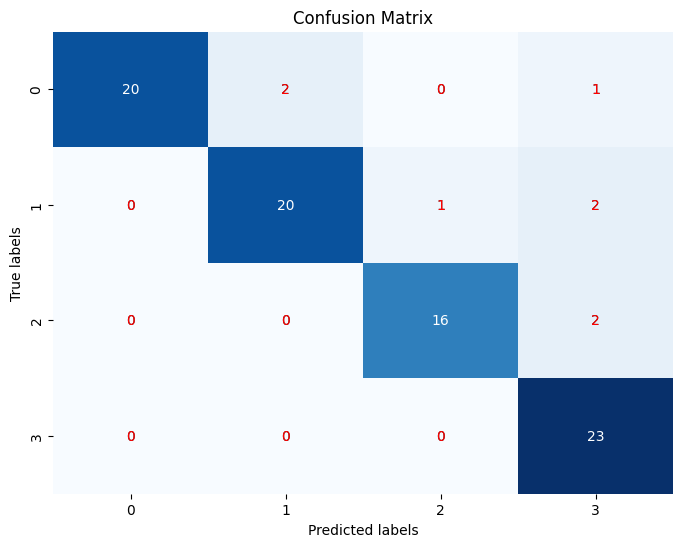

F1 Score: 0.9085291284828998
Sensibilidad (Recall): 0.9080459770114943
Especificidad por clase: [1.0, 0.96875, 0.9855072463768116, 0.921875]
Exactitud: 0.9080459770114943


In [16]:
# Obtener predicciones del modelo
y_pred = model.predict(X_test)

# Calcular la matriz de confusión multiclase
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcular métricas adicionales
f1 = f1_score(y_test, y_pred, average='weighted')
sensibilidad = recall_score(y_test, y_pred, average='weighted')
exactitud = accuracy_score(y_test, y_pred)

# Calcular especificidad para cada clase
especificidad = []
for i in range(len(conf_matrix)):
    true_negative = np.sum(np.delete(np.delete(conf_matrix, i, 0), i, 1))
    total_negative = np.sum(np.delete(conf_matrix, i, 0))
    especificidad.append(true_negative / total_negative)

# Visualizar la matriz de confusión con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)

# Resaltar los valores donde el modelo se confundió
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix)):
        if i != j:
            plt.text(j + 0.5, i + 0.5, conf_matrix[i, j], ha="center", va="center", color="red")

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Imprimir métricas
print("F1 Score:", f1)
print("Sensibilidad (Recall):", sensibilidad)
print("Especificidad por clase:", especificidad)
print("Exactitud:", exactitud)

Para complementar los resultados obtenidos a partir de la matriz de confusión y proporcionar una perspectiva más general del rendimiento del modelo Gradient Boosting, es útil comparar las predicciones del modelo con los autoinformes proporcionados por los participantes. Esta comparación permite evaluar la concordancia entre las respuestas emocionales predichas por el modelo y la percepción subjetiva de las emociones experimentadas por los individuos.

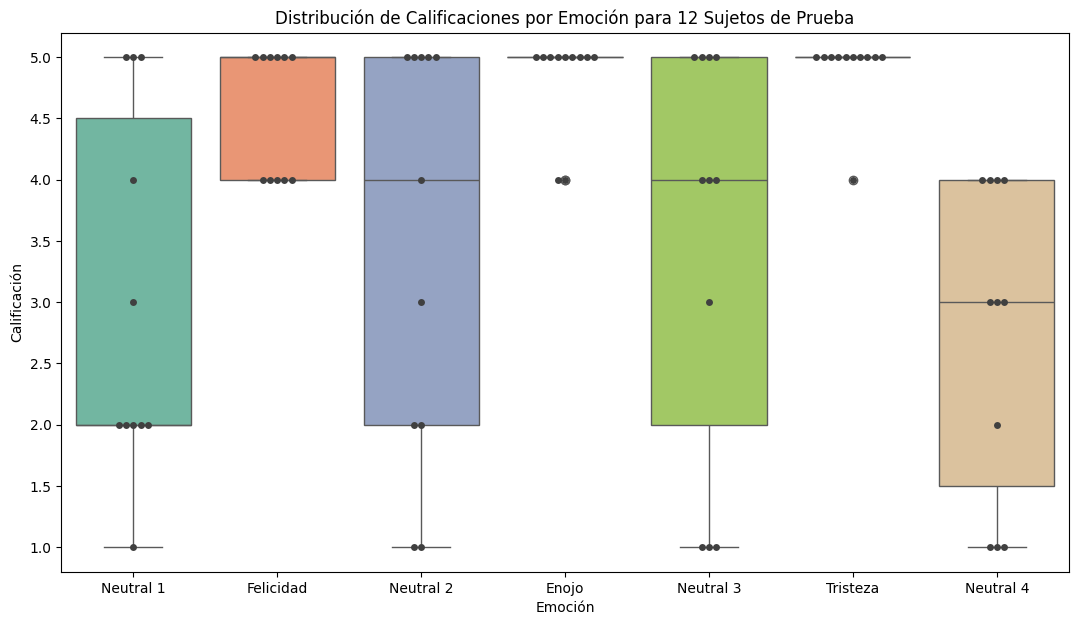

In [6]:
df = pd.DataFrame(datos)

# Ahora, creamos un boxplot con Seaborn para cada categoría en 'Emoción'
plt.figure(figsize=(13,7))
sns.boxplot(x='Emoción', y='Calificación', data=df, palette="Set2")

# Adicionalmente, podemos superponer un 'swarmplot' para ver todas las calificaciones individuales
sns.swarmplot(x='Emoción', y='Calificación', data=df, color=".25", dodge=True)

# Establecemos el título y mostramos el gráfico
plt.title('Distribución de Calificaciones por Emoción para 12 Sujetos de Prueba')
plt.show()

Se anexa otra gr&aacute;fica para ver la comparativa en las califiaciones de los participantes en su auto reporte.

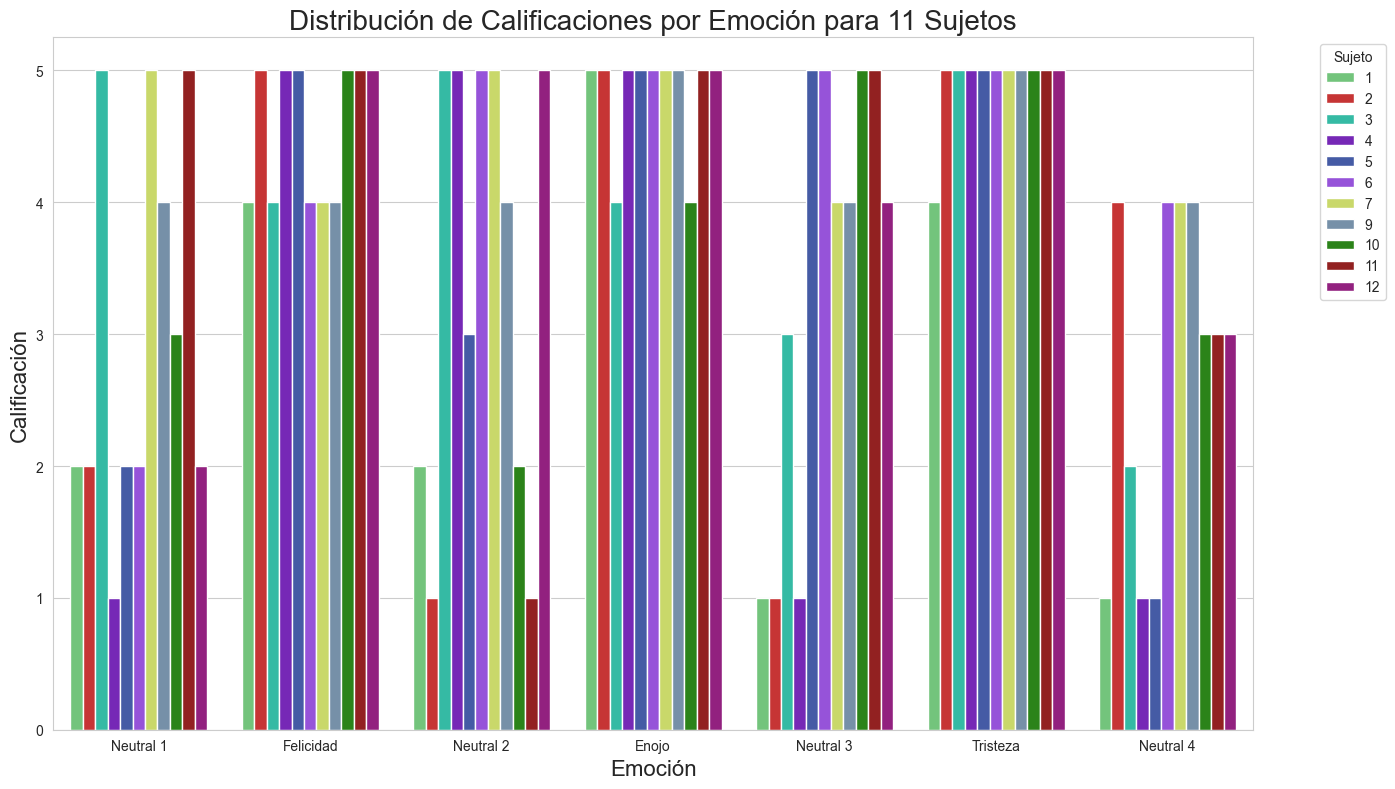

In [27]:
df_datos = pd.DataFrame(datos)

# Establecer el estilo de Seaborn
sns.set_style("whitegrid")

# Crear una paleta de colores personalizada con tonos de rosa distintos
custom_pink_palette = [
    "#65D271",  
    "#DE1D1D", 
    "#1FD0B3",  
    "#7810CE",  
    "#3552B5",  
    "#963DEF",  
    "#D7EB57",  
    "#6E90B0",  
    "#1F9507",  
    "#A50E0E",  
    "#A50E8C"   
]

# Gráfica de barras con la paleta de colores personalizada
plt.figure(figsize=(14, 8))
barplot = sns.barplot(
    x='Emoción',
    y='Calificación',
    hue='Sujeto',
    data=df_datos,
    palette=custom_pink_palette[:len(df_datos['Sujeto'].unique())]  # Usa solo los colores necesarios
)

# Añadir título y etiquetas para los ejes
plt.title('Distribución de Calificaciones por Emoción para 11 Sujetos', fontsize=20)
plt.xlabel('Emoción', fontsize=16)
plt.ylabel('Calificación', fontsize=16)

# Ajustar la leyenda
plt.legend(title='Sujeto', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar layout y mostrar la gráfica
plt.tight_layout()
plt.show()

## <span style="color:#EBBAF3;">Conclusiones</span> 

El estudio realizado proporciona evidencia de que los estímulos visuales, específicamente los vídeos, pueden influir significativamente en las emociones de los individuos, tal como se refleja tanto en los autoinformes como en las expresiones faciales capturadas. Aunque no se alcanzó una eficacia del 100%, un éxito del 85% es notable y sugiere que los vídeos seleccionados fueron generalmente efectivos en la inducción de las emociones deseadas.

Se tomo la decisión de analizar el rostro completo, debido a que al centrarse en las características específicas como los ojos, cejas, nariz y boca, no resultó en una mejora sustancial de la efectividad, incrementándola solo en un 1%. Además, esta aproximación condujo a una mayor confusión en la matriz de confusión, sin ofrecer diferencias significativas adicionales. Este resultado sugiere que la inclusión del rostro completo proporciona una visión más representativa de las expresiones emocionales, aunque el potencial para optimizar el análisis mediante la focalización en características específicas aún podría explorarse con ajustes adicionales en el código y una mayor precisión en la selección de los puntos de datos.

La elección de los vídeos neutrales, realizada de manera aleatoria con el único criterio de duración, puede no haber sido óptima para inducir un estado verdaderamente neutral en los participantes. La selección de vídeos con contenido específicamente diseñado para promover la relajación podría mejorar la eficacia de esta condición y, por ende, la precisión general del estudio.

Se excluyeron los datos de un participante del análisis final, reduciendo el número total de sujetos de 12 a 11, siendo una decisión metodológica significativa que refleja la importancia de la calidad y la relevancia de los datos en la construcción de modelos predictivos. En este caso, el sujeto excluido reportó no experimentar ninguna emoción en respuesta a los estímulos presentados, lo cual podría indicar una falta de compromiso o una desconexión con el contenido de los vídeos que podría sesgar o diluir las tendencias observadas en el conjunto de datos, por lo cual se decidi&oacute; no incluirlo.

En conclusión, los resultados obtenidos son prometedores y presentan oportunidades para futuras mejoras, incluyendo la incorporación de datos multimodales, como audio y medidas fisiológicas, que podrían enriquecer el análisis. Una investigación más profunda sobre el tipo de vídeos más efectivos para inducir emociones específicas también podría contribuir a optimizar la metodología.

Este estudio también resalta el valor educativo de realizar investigaciones de este tipo, ofreciendo experiencias prácticas en la recolección y análisis de datos emocionales. Futuras investigaciones podrían expandirse para incluir un espectro más amplio de emociones, como las propuestas por Ekman, con el objetivo de mejorar aún más la capacidad de detección de emociones a través de expresiones faciales.